In [42]:
import ase
import ase.io
from ase.io import xsf
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mohammad/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from pathlib import Path

pathlist = Path("data/structures/structures_3D_xsf_small/").glob('**/*.asm')

In [3]:
import os

path = 'data/structures/structures_3D_xsf_small/'

folder = os.fsencode(path)

filenames = []
structures = []
uiids = []


for file in os.listdir(folder):
    
    filename = os.fsdecode(file)
    uiid = filename.split('/')[-1].split('.xsf')[0]
    
    with open(path + os.fsdecode(file)) as f:
        structure = ase.io.xsf.read_xsf(f, index=- 1, read_data=False)
        
        structures.append(structure)
        uiids.append(uiid)
        



In [6]:
df = pd.DataFrame(list(zip(uiids, structures)), 
                  columns=['uiid', 'structure'])
df

,uiid,structure
0,ff8adefe-1c6c-4194-ad5f-a73a21360010,"(Atom('H', [0.5068652416, 4.2920579963, 4.7003..."
1,ffee7707-5c8f-4bdb-ac21-632e11f5833d,"(Atom('Si', [3.692364216, 7.327588456, 3.10475..."
2,ff1102df-2cef-4d8d-a601-1c62ce389cce,"(Atom('H', [17.7396590528, 4.2667548, 5.071097..."
3,ff9dc616-0d19-45fd-8e4a-66c96d842780,"(Atom('H', [6.1991436051, 1.8191698, 1.9452027..."
4,ffadf13b-a453-499f-9f68-ea9be02f00b9,"(Atom('H', [11.5511454, 5.8289976, 18.04741828..."
...,...,...
414,ff1f7fa0-68b8-4c8c-aaf2-857e9b3fc5bc,"(Atom('H', [1.20074746, 0.00472392, 17.7299712..."
415,ffb7329b-5ce6-4d87-85e0-269eb8fdb6f8,"(Atom('H', [6.6610976, 2.62499958, 2.582372], ..."
416,ff6571e8-141e-4230-a505-b97d9944bd21,"(Atom('U', [0.7975425475, 0.0, 2.5187476819], ..."
417,ffa2c42c-eb69-429e-be73-2c32e38b41d6,"(Atom('Cs', [-0.81297208, 15.897426, 1.5659158..."


In [11]:
with open(os.path.join('data', 'structures_df2_calc_with_bands_be.json')) as fhandle:
        df2 = json.load(fhandle)
with open(os.path.join('data', 'structures_rvv10_calc_with_bands_be.json')) as fhandle:
        rvv10 = json.load(fhandle)
with open(os.path.join('data', 'structures_revpbe_calc_with_bands_be.json')) as fhandle:
        revpbe = json.load(fhandle)

In [15]:
    binding_energies_raw = {}
    for uuid_key in set(df2).union(rvv10):
        subdict = {}
        df2_binding_energy = df2.get(uuid_key, {}).get('binding_energy', {})
        if df2_binding_energy:
            subdict['df2'] = df2_binding_energy
        if subdict:
            binding_energies_raw[uuid_key] = subdict
    
    print("Found {} entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand".format(
        len(binding_energies_raw)))

Found 2492 entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand


In [17]:
binding_energies_raw['06e6f0c5-04e0-48cf-be9e-cc2204f003fe']

{'df2': {'relevant_dimension_of_highest_dimensionality_substructure': 30.8076879603417,
  'binding_energy_per_substructure': -0.435934254099266,
  'number_of_atoms_in_bulk': 14,
  'uuid': '857544f3-bbf0-475f-ac7a-01fb5dbc0306',
  'delta_min': 0.55,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['P-1 (2)'],
  'relevant_dimension_units': 'ang^2',
  'transformation_mat': [[1.0, -0.0, -0.0],
   [-0.0, 1.0, 1.0],
   [-0.0, 1.0, 0.0]],
  'energy_units': 'eV',
  'sub_structure_dim': [2],
  'energy_bulk': -13486.1001569845,
  'sub_structure_formulas': ['C4H4Br2Cu2N2']}}

In [31]:
import os

path = 'data/structures/structures_3D_xsf/'

folder = os.fsencode(path)

filenames = []
structures = []
uiids = []

strucutres_not_found=0
for uiid in binding_energies_raw.keys():
    
    try:
        filename = uiid + '.xsf'
    
        with open(path + filename) as f:
            structure = ase.io.xsf.read_xsf(f, index=- 1, read_data=False)
        
            structures.append(structure)
            uiids.append(uiid)
    except FileNotFoundError:
        strucutres_not_found += 1
print(strucutres_not_found)

100


In [39]:
uiids = []
structures = []
cells = []
volumes = []
relevant_dimension_of_highest_dimensionality_substructures = []
binding_energy_per_substructures = []
binding_energies = []
labels = []
number_of_atoms_in_bulks = []
number_of_highest_dimensionality_substructures_in_bulks = []
sub_structure_spgs = []
sub_structure_dims = []
energy_bulks = []
sub_structure_formulas = []
for key in df2.keys():
    try:
        
        filename = uiid + '.xsf'
    
        with open(path + filename) as f:
            structure = ase.io.xsf.read_xsf(f, index=- 1, read_data=False)
        
        
        
        relevant_dimension_of_highest_dimensionality_substructures.append(df2[key]['binding_energy']['relevant_dimension_of_highest_dimensionality_substructure'])
        uiids.append(key)
        cells.append(df2[key]['cell'])
        volumes.append(df2[key]['volume'])
        binding_energy_per_substructures.append(df2[key]['binding_energy']['binding_energy_per_substructure'])
        tmp = ( -1000. *
                    df2[key]['binding_energy']['binding_energy_per_substructure']/
                    df2[key]['binding_energy']['relevant_dimension_of_highest_dimensionality_substructure'])
        binding_energies.append(tmp)
        
        if tmp <= 30:
            labels.append('EE')
        elif 30 < tmp <= 130:
            labels.append('PE')
        else:
            labels.append('HBE')
        
        structures.append(structure)        
        number_of_atoms_in_bulks.append(df2[key]['binding_energy']['number_of_atoms_in_bulk'])
        number_of_highest_dimensionality_substructures_in_bulks.append(df2[key]['binding_energy']['number_of_highest_dimensionality_substructures_in_bulk'])
        sub_structure_spgs.append(df2[key]['binding_energy']['sub_structure_spg'])
        sub_structure_dims.append(df2[key]['binding_energy']['sub_structure_dim'])
        energy_bulks.append(df2[key]['binding_energy']['energy_bulk'])
        sub_structure_formulas.append(df2[key]['binding_energy']['sub_structure_formulas'])
    except KeyError:
        continue

data_df2 = {
    'uiid' : uiids,
    'structure' : structures,
    'cell' : cells,
    'volume' : volumes,
    'relevant_dimension_of_highest_dimensionality_substructure' : relevant_dimension_of_highest_dimensionality_substructures,
    'binding_energy_per_substructure' : binding_energy_per_substructures,
    'binding_energy' : binding_energies,
    'label' : labels,
    'number_of_atoms_in_bulk' : number_of_atoms_in_bulks,
    'number_of_highest_dimensionality_substructures_in_bulk' : number_of_highest_dimensionality_substructures_in_bulks,
    'sub_structure_spg' : sub_structure_spgs,
    'sub_structure_dim' : sub_structure_dims,
    'energy_bulk' : energy_bulks,
    'sub_structure_formula' : sub_structure_formulas
}

dataframe_df2 = pd.DataFrame(data_df2)

In [117]:
dataframe_df2.head()

,uiid,structure,cell,volume,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,label,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula,PMG Structure from ASE Atoms
0,dec2d070-d2ad-41f3-b742-786368ade33a,"(Atom('Na', [2.059, 1.1887642043, 6.94], index...","[[2.1044124705, 1.2149831063, 34.279850741], [...",525.885600,15.340954,-0.165000,10.755509,EE,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]","[[2.059 1.1887642 6.94 ] Na, [ 0.00000..."
1,51e630e8-d94f-421c-bd1e-3e2f298e740c,"(Atom('Na', [2.059, 1.1887642043, 6.94], index...","[[3.35814166734363, 3.21879556184565e-14, -3.2...",52.188194,9.766268,-0.149888,15.347484,EE,3,1,[P-3m1 (164)],[2],-5361.474444,[Cl2Fe],"[[2.059 1.1887642 6.94 ] Na, [ 0.00000..."
2,527e7b32-d211-4743-9631-120122819190,"(Atom('Na', [2.059, 1.1887642043, 6.94], index...","[[2.14789490163679, -12.5878501270869, 0.0], [...",232.520056,18.471785,-0.454048,24.580650,EE,8,1,[P2_1/m (11)],[2],-26090.090963,[Er2Te6],"[[2.059 1.1887642 6.94 ] Na, [ 0.00000..."
3,37bf14b1-6529-436c-a519-e1ad9b208784,"(Atom('Na', [2.059, 1.1887642043, 6.94], index...","[[-2.0745739339, 2.0745739339, 7.4278571834], ...",127.873741,17.215428,-0.747937,43.445746,PE,3,1,[C2/m (12)],[2],-2866.173187,[Ba2Hg],"[[2.059 1.1887642 6.94 ] Na, [ 0.00000..."
4,e7a9cec3-f11a-4d16-a8c5-ebd758bb6592,"(Atom('Na', [2.059, 1.1887642043, 6.94], index...","[[4.6829418165, 0.0, 0.0], [0.0, 4.6829418165,...",166.823529,21.929944,-0.532853,24.297979,EE,6,1,[P4/nmm (129)],[2],-3217.539658,[Ba2H2I2],"[[2.059 1.1887642 6.94 ] Na, [ 0.00000..."


<AxesSubplot:xlabel='volume'>

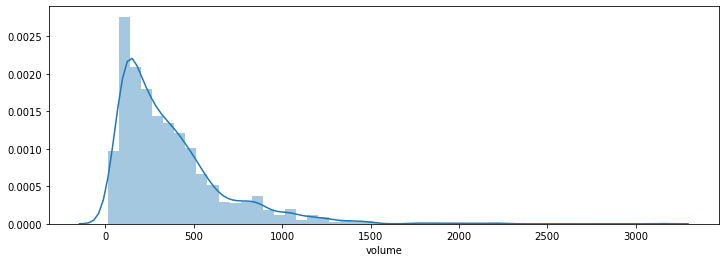

In [47]:
plt.figure(figsize = (12,4))
sns.distplot(dataframe_df2['volume'])

<AxesSubplot:xlabel='label', ylabel='count'>

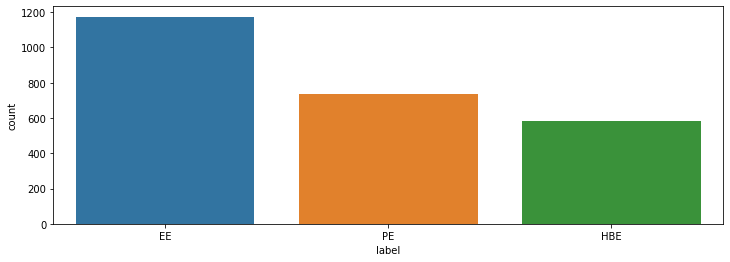

In [48]:
plt.figure(figsize = (12,4))
sns.countplot(dataframe_df2['label'])

<AxesSubplot:>

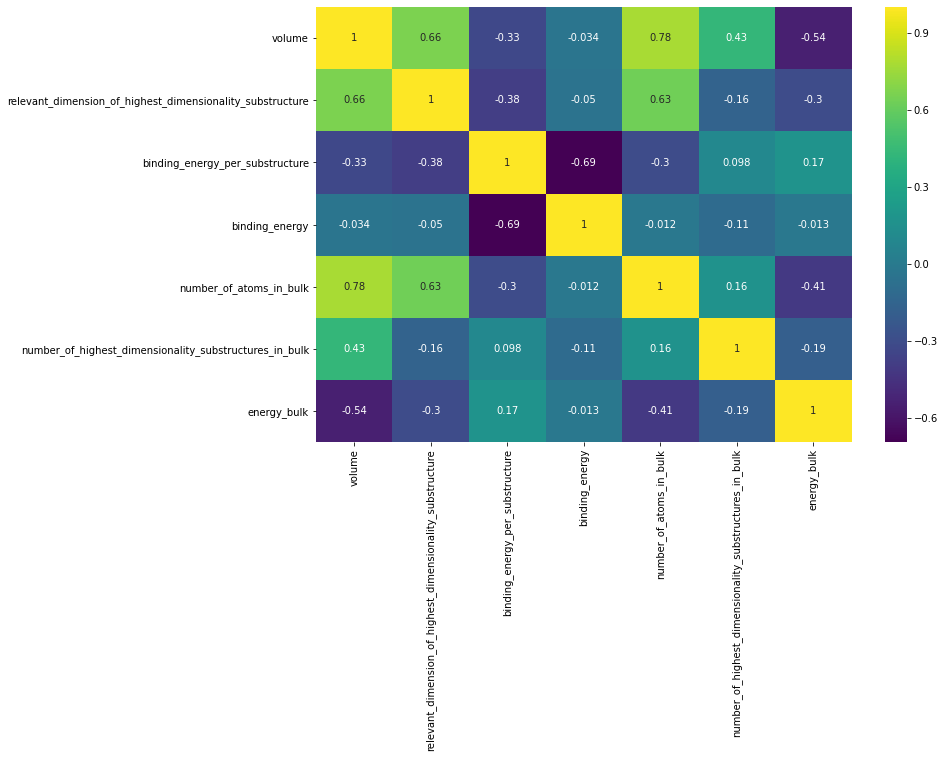

In [49]:
plt.figure(figsize = (12,8))
sns.heatmap(dataframe_df2.corr(), annot = True, cmap = 'viridis')

In [50]:
from matminer.featurizers.conversions import ASEAtomstoStructure

In [51]:
aa2s = ASEAtomstoStructure()
dataframe_df2 = aa2s.fit_featurize_dataframe(dataframe_df2, col_id= 'structure', ignore_errors=True)

ASEAtomstoStructure:   0%|          | 0/2492 [00:00<?, ?it/s]

In [53]:
dataframe_df2.columns

Index(['uiid', 'structure', 'cell', 'volume',
       'relevant_dimension_of_highest_dimensionality_substructure',
       'binding_energy_per_substructure', 'binding_energy', 'label',
       'number_of_atoms_in_bulk',
       'number_of_highest_dimensionality_substructures_in_bulk',
       'sub_structure_spg', 'sub_structure_dim', 'energy_bulk',
       'sub_structure_formula', 'PMG Structure from ASE Atoms'],
      dtype='object')

In [55]:
structures = list(dataframe_df2["PMG Structure from ASE Atoms"])
gridpoints = list(dataframe_df2.index)

In [56]:
features = {n:{} for n in gridpoints}

In [58]:
for name in gridpoints:
    features[name]["structure"]=dataframe_df2["PMG Structure from ASE Atoms"][name]

In [59]:
data=pd.DataFrame.from_dict(features).T

In [61]:
features_dict={}
## 1. initialize the dictionary for each site
for index,row in data.iterrows():
    structure=row["structure"]
    for atomidx in range(structure.num_sites):
        site_name="%s_%i"%(index,atomidx)
        features_dict[site_name]={}

In [62]:
features_dict

{'0_0': {},
 '0_1': {},
 '0_2': {},
 '0_3': {},
 '1_0': {},
 '1_1': {},
 '1_2': {},
 '1_3': {},
 '2_0': {},
 '2_1': {},
 '2_2': {},
 '2_3': {},
 '3_0': {},
 '3_1': {},
 '3_2': {},
 '3_3': {},
 '4_0': {},
 '4_1': {},
 '4_2': {},
 '4_3': {},
 '5_0': {},
 '5_1': {},
 '5_2': {},
 '5_3': {},
 '6_0': {},
 '6_1': {},
 '6_2': {},
 '6_3': {},
 '7_0': {},
 '7_1': {},
 '7_2': {},
 '7_3': {},
 '8_0': {},
 '8_1': {},
 '8_2': {},
 '8_3': {},
 '9_0': {},
 '9_1': {},
 '9_2': {},
 '9_3': {},
 '10_0': {},
 '10_1': {},
 '10_2': {},
 '10_3': {},
 '11_0': {},
 '11_1': {},
 '11_2': {},
 '11_3': {},
 '12_0': {},
 '12_1': {},
 '12_2': {},
 '12_3': {},
 '13_0': {},
 '13_1': {},
 '13_2': {},
 '13_3': {},
 '14_0': {},
 '14_1': {},
 '14_2': {},
 '14_3': {},
 '15_0': {},
 '15_1': {},
 '15_2': {},
 '15_3': {},
 '16_0': {},
 '16_1': {},
 '16_2': {},
 '16_3': {},
 '17_0': {},
 '17_1': {},
 '17_2': {},
 '17_3': {},
 '18_0': {},
 '18_1': {},
 '18_2': {},
 '18_3': {},
 '19_0': {},
 '19_1': {},
 '19_2': {},
 '19_3': {},


In [63]:
from matminer.featurizers.site import CrystalNNFingerprint, GaussianSymmFunc, SiteElementalProperty,AGNIFingerprints,LocalPropertyDifference

In [64]:
## 2. Site Elemental Property
property_list=("Number","AtomicWeight","Row","Column","Electronegativity","CovalentRadius")
SEP = SiteElementalProperty(properties=property_list)
colnames=SEP._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    for atomidx in range(structure.num_sites):
        feat=SEP.featurize(structure,idx=atomidx)
        site_name="%s_%i"%(index,atomidx)
        features_dict[site_name].update(dict(zip(colnames, feat)))

In [66]:
features_dict['0_0']

{'site Number': 11.0,
 'site AtomicWeight': 22.98976928,
 'site Row': 3.0,
 'site Column': 1.0,
 'site Electronegativity': 0.93,
 'site CovalentRadius': 166.0}

In [67]:
## 3. AGNI
property_list=("Number","AtomicWeight","Row","Column","Electronegativity","CovalentRadius")
AGNI = AGNIFingerprints(cutoff=5,directions=[None])
colnames=AGNI._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    for atomidx in range(structure.num_sites):
        feat=AGNI.featurize(structure,idx=atomidx)
        site_name="%s_%i"%(index,atomidx)
        features_dict[site_name].update(dict(zip(colnames, feat)))

In [68]:
features_dict['0_0']

{'site Number': 11.0,
 'site AtomicWeight': 22.98976928,
 'site Row': 3.0,
 'site Column': 1.0,
 'site Electronegativity': 0.93,
 'site CovalentRadius': 166.0,
 'AGNI eta=8.00e-01': 2.4495235914585035e-07,
 'AGNI eta=1.23e+00': 0.002157339118382417,
 'AGNI eta=1.88e+00': 0.10800120750270334,
 'AGNI eta=2.89e+00': 0.6270769136524573,
 'AGNI eta=4.43e+00': 1.3910511468477298,
 'AGNI eta=6.80e+00': 1.977394131120926,
 'AGNI eta=1.04e+01': 2.302403265794185,
 'AGNI eta=1.60e+01': 2.457462200163428}

In [69]:
## 4. Gaussian Symmetry Functions 
GSF = GaussianSymmFunc(cutoff=5)
colnames=GSF._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    for atomidx in range(structure.num_sites):
        feat=GSF.featurize(structure,idx=atomidx)
        site_name="%s_%i"%(index,atomidx)
        features_dict[site_name].update(dict(zip(colnames, feat)))

In [70]:
features_dict['0_0']

{'site Number': 11.0,
 'site AtomicWeight': 22.98976928,
 'site Row': 3.0,
 'site Column': 1.0,
 'site Electronegativity': 0.93,
 'site CovalentRadius': 166.0,
 'AGNI eta=8.00e-01': 2.4495235914585035e-07,
 'AGNI eta=1.23e+00': 0.002157339118382417,
 'AGNI eta=1.88e+00': 0.10800120750270334,
 'AGNI eta=2.89e+00': 0.6270769136524573,
 'AGNI eta=4.43e+00': 1.3910511468477298,
 'AGNI eta=6.80e+00': 1.977394131120926,
 'AGNI eta=1.04e+01': 2.302403265794185,
 'AGNI eta=1.60e+01': 2.457462200163428,
 'G2_0.05': 2.516086252879511,
 'G2_4.0': 0.4007838994661629,
 'G2_20.0': 0.000543991080305119,
 'G2_80.0': 1.5985971588332977e-14,
 'G4_0.005_1.0_1.0': 0.34429493936617933,
 'G4_0.005_1.0_-1.0': 0.0864996347529475,
 'G4_0.005_4.0_1.0': 0.19374772657551179,
 'G4_0.005_4.0_-1.0': 0.002904072689715388}

In [71]:
df_features=pd.DataFrame.from_dict(features_dict).T.astype(float)

In [72]:
df_features.head()

,site Number,site AtomicWeight,site Row,site Column,site Electronegativity,site CovalentRadius,AGNI eta=8.00e-01,AGNI eta=1.23e+00,AGNI eta=1.88e+00,AGNI eta=2.89e+00,...,AGNI eta=1.04e+01,AGNI eta=1.60e+01,G2_0.05,G2_4.0,G2_20.0,G2_80.0,G4_0.005_1.0_1.0,G4_0.005_1.0_-1.0,G4_0.005_4.0_1.0,G4_0.005_4.0_-1.0
0_0,11.0,22.989769,3.0,1.0,0.93,166.0,2.449524e-07,0.002157,0.108001,0.627077,...,2.302403,2.457462,2.516086,0.400784,0.000544,1.598597e-14,0.344295,0.086500,0.193748,0.002904
0_1,39.0,88.905850,5.0,3.0,1.22,190.0,2.067022e-05,0.017524,0.313530,1.140645,...,3.076943,3.239968,3.301230,0.819318,0.006309,9.541304e-11,0.731847,0.333865,0.324763,0.030543
0_2,34.0,78.960000,4.0,16.0,2.55,120.0,1.045833e-05,0.009930,0.221743,0.952280,...,2.859084,3.022325,3.083673,0.654884,0.003442,4.771451e-11,0.665165,0.219081,0.342818,0.015929
0_3,34.0,78.960000,4.0,16.0,2.55,120.0,1.045833e-05,0.009930,0.221743,0.952280,...,2.859084,3.022325,3.083673,0.654884,0.003442,4.771451e-11,0.665165,0.219081,0.342818,0.015929
1_0,11.0,22.989769,3.0,1.0,0.93,166.0,2.449524e-07,0.002157,0.108001,0.627077,...,2.302403,2.457462,2.516086,0.400784,0.000544,1.598597e-14,0.344295,0.086500,0.193748,0.002904


In [73]:
df_features.to_pickle("features.pkl")

In [74]:
df_features.reset_index(inplace=True)

In [111]:
df_features.head()

,index,site Number,site AtomicWeight,site Row,site Column,site Electronegativity,site CovalentRadius,AGNI eta=8.00e-01,AGNI eta=1.23e+00,AGNI eta=1.88e+00,...,AGNI eta=1.60e+01,G2_0.05,G2_4.0,G2_20.0,G2_80.0,G4_0.005_1.0_1.0,G4_0.005_1.0_-1.0,G4_0.005_4.0_1.0,G4_0.005_4.0_-1.0,structure_number
0,0_0,11.0,22.989769,3.0,1.0,0.93,166.0,2.449524e-07,0.002157,0.108001,...,2.457462,2.516086,0.400784,0.000544,1.598597e-14,0.344295,0.086500,0.193748,0.002904,0
1,0_1,39.0,88.905850,5.0,3.0,1.22,190.0,2.067022e-05,0.017524,0.313530,...,3.239968,3.301230,0.819318,0.006309,9.541304e-11,0.731847,0.333865,0.324763,0.030543,0
2,0_2,34.0,78.960000,4.0,16.0,2.55,120.0,1.045833e-05,0.009930,0.221743,...,3.022325,3.083673,0.654884,0.003442,4.771451e-11,0.665165,0.219081,0.342818,0.015929,0
3,0_3,34.0,78.960000,4.0,16.0,2.55,120.0,1.045833e-05,0.009930,0.221743,...,3.022325,3.083673,0.654884,0.003442,4.771451e-11,0.665165,0.219081,0.342818,0.015929,0
4,1_0,11.0,22.989769,3.0,1.0,0.93,166.0,2.449524e-07,0.002157,0.108001,...,2.457462,2.516086,0.400784,0.000544,1.598597e-14,0.344295,0.086500,0.193748,0.002904,1


In [ ]:
df.groupby

In [ ]:
df_Li_features = df_features.loc[[str(i)+"_78" for i in range(292)]]

In [92]:
df_features['structure_number'] = df_features['index'].apply(lambda x : x.split('_')[0])

In [110]:
df_features.head()

,index,site Number,site AtomicWeight,site Row,site Column,site Electronegativity,site CovalentRadius,AGNI eta=8.00e-01,AGNI eta=1.23e+00,AGNI eta=1.88e+00,...,AGNI eta=1.60e+01,G2_0.05,G2_4.0,G2_20.0,G2_80.0,G4_0.005_1.0_1.0,G4_0.005_1.0_-1.0,G4_0.005_4.0_1.0,G4_0.005_4.0_-1.0,structure_number
0,0_0,11.0,22.989769,3.0,1.0,0.93,166.0,2.449524e-07,0.002157,0.108001,...,2.457462,2.516086,0.400784,0.000544,1.598597e-14,0.344295,0.086500,0.193748,0.002904,0
1,0_1,39.0,88.905850,5.0,3.0,1.22,190.0,2.067022e-05,0.017524,0.313530,...,3.239968,3.301230,0.819318,0.006309,9.541304e-11,0.731847,0.333865,0.324763,0.030543,0
2,0_2,34.0,78.960000,4.0,16.0,2.55,120.0,1.045833e-05,0.009930,0.221743,...,3.022325,3.083673,0.654884,0.003442,4.771451e-11,0.665165,0.219081,0.342818,0.015929,0
3,0_3,34.0,78.960000,4.0,16.0,2.55,120.0,1.045833e-05,0.009930,0.221743,...,3.022325,3.083673,0.654884,0.003442,4.771451e-11,0.665165,0.219081,0.342818,0.015929,0
4,1_0,11.0,22.989769,3.0,1.0,0.93,166.0,2.449524e-07,0.002157,0.108001,...,2.457462,2.516086,0.400784,0.000544,1.598597e-14,0.344295,0.086500,0.193748,0.002904,1


In [106]:
df_features_grp = df_features.groupby(by = 'structure_number', axis = 0)

In [107]:
df_features_grp.get_group('0')

,index,site Number,site AtomicWeight,site Row,site Column,site Electronegativity,site CovalentRadius,AGNI eta=8.00e-01,AGNI eta=1.23e+00,AGNI eta=1.88e+00,...,AGNI eta=1.60e+01,G2_0.05,G2_4.0,G2_20.0,G2_80.0,G4_0.005_1.0_1.0,G4_0.005_1.0_-1.0,G4_0.005_4.0_1.0,G4_0.005_4.0_-1.0,structure_number
0,0_0,11.0,22.989769,3.0,1.0,0.93,166.0,2.449524e-07,0.002157,0.108001,...,2.457462,2.516086,0.400784,0.000544,1.598597e-14,0.344295,0.086500,0.193748,0.002904,0
1,0_1,39.0,88.905850,5.0,3.0,1.22,190.0,2.067022e-05,0.017524,0.313530,...,3.239968,3.301230,0.819318,0.006309,9.541304e-11,0.731847,0.333865,0.324763,0.030543,0
2,0_2,34.0,78.960000,4.0,16.0,2.55,120.0,1.045833e-05,0.009930,0.221743,...,3.022325,3.083673,0.654884,0.003442,4.771451e-11,0.665165,0.219081,0.342818,0.015929,0
3,0_3,34.0,78.960000,4.0,16.0,2.55,120.0,1.045833e-05,0.009930,0.221743,...,3.022325,3.083673,0.654884,0.003442,4.771451e-11,0.665165,0.219081,0.342818,0.015929,0


In [108]:
df_features_grp.describe().transpose()

structure_number                 0          1         10        100  \
site Number       count   4.000000   4.000000   4.000000   4.000000   
                  mean   29.500000  29.500000  29.500000  29.500000   
                  std    12.556539  12.556539  12.556539  12.556539   
                  min    11.000000  11.000000  11.000000  11.000000   
                  25%    28.250000  28.250000  28.250000  28.250000   
...                            ...        ...        ...        ...   
G4_0.005_4.0_-1.0 min     0.002904   0.002904   0.002904   0.002904   
                  25%     0.012673   0.012673   0.012673   0.012673   
                  50%     0.015929   0.015929   0.015929   0.015929   
                  75%     0.019583   0.019583   0.019583   0.019583   
                  max     0.030543   0.030543   0.030543   0.030543   

structure_number              1000       1001       1002       1003  \
site Number       count   4.000000   4.000000   4.000000   4.000000   
                  mean   29.500000  29.500000  29.500000  29.500000   
                  std    12.556539  12.556539  12.556539  12.556539   
                  min    11.000000  11.000000  11.000000  11.000000   
                  25%    28.250000  28.250000  28.250000  28.250000   
...                            ...        ...        ...        ...   
G4_0.005_4.0_-1.0 min     0.002904   0.002904   0.002904   0.002904   
                  25%     0.012673   0.012673   0.012673   0.012673   
                  50%     0.015929   0.015929   0.015929   0.015929   
                  75%     0.019583   0.019583   0.019583   0.019583   
                  max     0.030543   0.030543   0.030543   0.030543   

structure_number              1004       1005  ...        990        991  \
site Number       count   4.000000   4.000000  ...   4.000000   4.000000   
                  mean   29.500000  29.500000  ...  29.500000  29.500000   
                  std    12.556539  12.556539  ...  12.556539  12.556539   
                  min    11.000000  11.000000  ...  11.000000  11.000000   
                  25%    28.250000  28.250000  ...  28.250000  28.250000   
...                            ...        ...  ...        ...        ...   
G4_0.005_4.0_-1.0 min     0.002904   0.002904  ...   0.002904   0.002904   
                  25%     0.012673   0.012673  ...   0.012673   0.012673   
                  50%     0.015929   0.015929  ...   0.015929   0.015929   
                  75%     0.019583   0.019583  ...   0.019583   0.019583   
                  max     0.030543   0.030543  ...   0.030543   0.030543   

structure_number               992        993        994        995  \
site Number       count   4.000000   4.000000   4.000000   4.000000   
                  mean   29.500000  29.500000  29.500000  29.500000   
                  std    12.556539  12.556539  12.556539  12.556539   
                  min    11.000000  11.000000  11.000000  11.000000   
                  25%    28.250000  28.250000  28.250000  28.250000   
...                            ...        ...        ...        ...   
G4_0.005_4.0_-1.0 min     0.002904   0.002904   0.002904   0.002904   
                  25%     0.012673   0.012673   0.012673   0.012673   
                  50%     0.015929   0.015929   0.015929   0.015929   
                  75%     0.019583   0.019583   0.019583   0.019583   
                  max     0.030543   0.030543   0.030543   0.030543   

structure_number               996        997        998        999  
site Number       count   4.000000   4.000000   4.000000   4.000000  
                  mean   29.500000  29.500000  29.500000  29.500000  
                  std    12.556539  12.556539  12.556539  12.556539  
                  min    11.000000  11.000000  11.000000  11.000000  
                  25%    28.250000  28.250000  28.250000  28.250000  
...                            ...        ...        ...        ...  
G4_0.005_4.0_-1.0 min     0.002904   0

In [109]:
pd.merge(df_features_grp, dataframe_df2, on = ['structure_number', 'index'])

TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.groupby.generic.DataFrameGroupBy'> was passed

In [ ]:
df = pd.concat([df, df_Li_features], axis = 1)